In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import os
import numpy as np  
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Model

In [6]:
base_path = '/content/drive/MyDrive/close_to_closet'

inceptionV3_model = tf.keras.models.load_model(os.path.join(base_path,
                                                            'checkpoints',
                                                            'inceptionV3_model.h5'))

In [19]:
class FeatureExtractor:
    def __init__(self):
        base_model = inceptionV3_model
        base_inputs = base_model.layers[0].input
        base_outputs = base_model.layers[-2].output
        self.model = Model(inputs=base_inputs, outputs=base_outputs)

    def rgba2rgb(self, rgba, background=(255,255,255)):
        row, col, ch = rgba.shape

        if ch == 3:
            return rgba
        assert ch == 4, 'RGBA image has 4 channels.'

        rgb = np.zeros((row, col, 3), dtype='float32')
        r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
        a = np.asarray(a, dtype='float32') / 255.0

        R, G, B = background
        rgb[:,:,0] = r * a + (1.0 - a) * R
        rgb[:,:,1] = g * a + (1.0 - a) * G
        rgb[:,:,2] = b * a + (1.0 - a) * B

        return np.asarray( rgb, dtype='uint8' )


    def extract(self, img):
        display(img)
        img = image.img_to_array(img)
        img = self.rgba2rgb(img)
        #### Error here ###############
        # img = img[107:-106, 107:-106]  
        ###############################

        plt.imshow(img, interpolation='nearest')
        plt.show()

        img = np.expand_dims(img, axis=0)
        img = img.astype('float32')
        img = img / 255.0

        feature = self.model.predict(img)[0]
        print(feature.shape)
        return feature / np.linalg.norm(feature)


Declare feature Extractor

In [24]:
fe = FeatureExtractor()

Extract features of test data

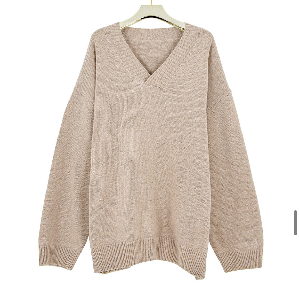

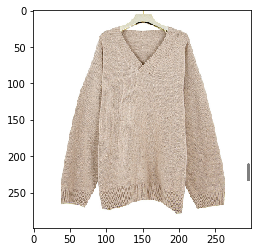

(2048,)


In [44]:
# load test data
file_path = 'dataset/'
test_path = os.path.join(base_path, file_path, '11.PNG')

### Modified here ###
test_image = load_img(test_path, target_size=(299, 299), color_mode='rgba')
#####################

# extract test image features
target = fe.extract(img=test_image)

In [54]:
#config
feature_path = 'features/'
file_path = 'dataset/database/'
count = 3

# initialization
features = []

Extract features of DB data

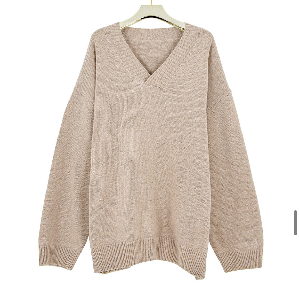

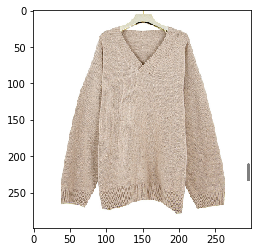

(2048,)
feature is saved at /content/drive/MyDrive/close_to_closet/features/1.npy


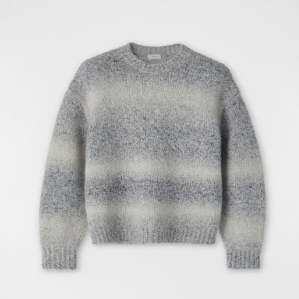

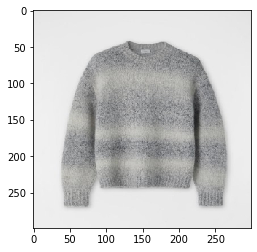

(2048,)
feature is saved at /content/drive/MyDrive/close_to_closet/features/2.npy


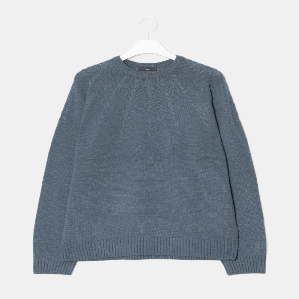

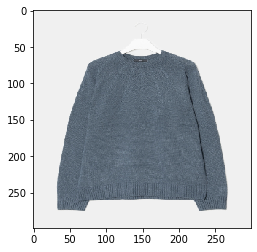

(2048,)
feature is saved at /content/drive/MyDrive/close_to_closet/features/3.npy


In [55]:
for i in range(1,count+1):
  image_name = f'{i}.PNG'
  feature_name = f'{i}.npy'

  # load test data
  test_path = os.path.join(base_path, file_path, image_name)

  ### Modified here ###
  test_image = load_img(test_path, target_size=(299, 299), color_mode='rgba')
  #####################

  # extract test image features
  feature = fe.extract(img=test_image)
  features.append(feature)

  matrix_path = os.path.join(base_path, feature_path, feature_name)
  np.save(matrix_path, feature)
  print(f'feature is saved at {matrix_path}')

Extract features of database images

In [56]:
print(features)

[array([0.00356238, 0.01233122, 0.0121746 , ..., 0.05518121, 0.04211023,
       0.02770723], dtype=float32), array([0.00147871, 0.01256681, 0.00063166, ..., 0.02425316, 0.04806837,
       0.00395494], dtype=float32), array([0.00052679, 0.0194212 , 0.00333049, ..., 0.04159659, 0.04085983,
       0.00674771], dtype=float32)]


In [57]:
# Calculate the similarity (distance) between images
dists = np.linalg.norm(features - target, axis=1)
print(np.argmin(dists))

0


In [58]:
print(dists)

[0.         0.48515302 0.4429973 ]
